In [7]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import cluster
from sklearn import metrics
from sklearn import ensemble

In [8]:
data_df = pd.read_csv('titanic.csv')
y_data = data_df[['Survived']]
del data_df['Survived']
x_data = data_df.copy()

## 데이터 전처리 과정

In [9]:
# 성별 분류 하기
sex_mapping = {"male": 0, "female":1}
x_data['Sex'] = x_data['Sex'].map(sex_mapping)

# fare 그룹화해서 진행
x_data.loc[x_data['Fare'] <= 7.854, 'Fare'] = 0
x_data.loc[(x_data['Fare'] > 7.854) & (x_data['Fare'] <= 10.5), 'Fare'] = 1
x_data.loc[(x_data['Fare'] > 10.5) & (x_data['Fare'] <= 21.679), 'Fare']   = 2
x_data.loc[(x_data['Fare'] > 21.679) & (x_data['Fare'] <= 39.688), 'Fare']   = 3
x_data.loc[ x_data['Fare'] > 39.688, 'Fare'] = 4
x_data['Fare'] = x_data['Fare'].astype(int)

# Age 결측값 채우기 > Age의 평균으로 값 넣기
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

# Age 나이대별로 그룹화해서 전처리.
x_data.loc[ x_data['Age'] <=20, 'Age']=0,
x_data.loc[(x_data['Age'] > 20) & (x_data['Age'] <=40), 'Age'] = 1,
x_data.loc[(x_data['Age'] > 40) & (x_data['Age'] <=60), 'Age'] = 2,
x_data.loc[(x_data['Age'] > 60), 'Age'] = 3

# 행선지 전처리
embarked_mapping = {"S" : 0, "C" : 1, "Q" : 2}
x_data['Embarked'] = x_data['Embarked'].map(embarked_mapping)
x_data['Embarked'] = x_data['Embarked'].fillna(0)

# Cabin 데이터 정형화 하기.
x_data['Cabin'] = x_data['Cabin'].fillna(0)
for i in range(len(x_data)):
    # Cabin 데이터 전처리 방수별로 숫자 카운팅
    count = 0
    if type(x_data.loc[i, ['Cabin']][0]) == type('str') :
        for j in list(x_data.loc[i, ['Cabin']][0]) :
            try :
                int(j)
            except:
                count = count + 1
                if j == ' ' :
                    count = count - 1
        x_data.loc[i, ['Cabin']] = count
        
# 이름에서 Mr, Miss, Nrs, Master만 추출하여 Title 열 만들기
x_data['Title'] = x_data['Name'].str.extract('([A-za-z]+)\.', expand=False)
# 이름에서 Mr, Mirr, Mrs, Master의 갯수 확인하기
x_data['Title'].value_counts()
# Mapping을 이용해서 치환하기
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 4, 
                 "Rev" : 4, "Mlle" : 4, "Col" : 4, "Major" : 4, "Sir" : 4, 
                 "Jonkheer" : 4, "Countess" : 4, "Mme" : 4, "Capt" : 4, "Lady" : 4,
                 "Ms" : 4, "Don" : 4}
x_data["Title"] = x_data["Title"].map(title_mapping)

# Name 열 삭제하기
del x_data["Name"]
# Ticket 열 삭제하기
del x_data['Ticket']
del x_data['PassengerId']

# # Family 열 추가
# x_data["Family"] = x_data["Parch"] + x_data["SibSp"]
# x_data['Family'] = x_data['Family'].astype(int)


x_data['Age'] = x_data['Age'].astype('float32')
x_data['Fare'] = x_data['Fare'].astype('float32')
x_data['Embarked'] = x_data['Embarked'].astype('float32')

# print(x_data.dtypes)
column_namelist = list(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# 데이터 0~1사이로 정형화
sc = StandardScaler()
sc.fit(x_train)
X_train_scaled = sc.transform(x_train)
X_test_scaled = sc.transform(x_test)

df = pd.DataFrame(X_train_scaled)
df_y = pd.DataFrame(X_test_scaled)
df.head()

,0,1,2,3,4,5,6,7,8
0,-1.532556,-0.725921,1.513781,-0.457246,-0.472998,0.672559,1.367785,-0.552708,-0.698985
1,-1.532556,1.377561,1.513781,0.403371,-0.472998,1.382735,1.367785,1.012461,1.219374
2,0.848448,-0.725921,-1.518648,3.845840,1.932533,1.382735,-0.521639,-0.552708,2.178553
3,-1.532556,-0.725921,1.513781,-0.457246,0.729768,1.382735,1.367785,-0.552708,-0.698985
4,0.848448,1.377561,-0.002434,0.403371,-0.472998,-0.037618,-0.521639,1.012461,1.219374


## 모델 예측

### KNN

In [10]:
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

model_knn = neighbors.KNeighborsClassifier(6)
model_knn.fit(X_train_scaled, y_train)
y_predict = model_knn.predict(X_train_scaled)
print('KNN 모델 적용')
print('Accuracy on Training set: ',end='')
print(accuracy_score(y_predict, y_train))
y_predict = model_knn.predict(x_test)
print('Accuracy on Test set: ',end='')
print(accuracy_score(y_predict, y_test))

KNN 모델 적용
Accuracy on Training set: 0.841091492776886
Accuracy on Test set: 0.7425373134328358


### Linear SVM

In [11]:
# 가장 기본적인 서포트 벡터 머신
linear_svm = LinearSVC().fit(X_train_scaled, y_train)
print('linear SVC')
print("linear Accuracy on Training set: {:.3f}".format(linear_svm.score(x_train, y_train)))
print("linear Accuracy on Test set: {:.3f}".format(linear_svm.score(x_test, y_test)))

linear SVC
linear Accuracy on Training set: 0.799
linear Accuracy on Test set: 0.776


### Kernelized SVM

- Kernelized Support Vector Machine 디폴트 값 확인
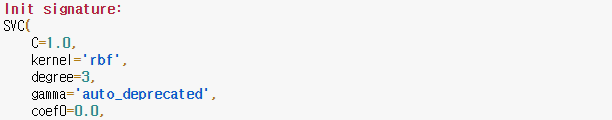

In [12]:
# Kernelized Support Vector Machine 
# Kernal = RBF
# Hyperparameter를 모두 default로 했을 때
svc = SVC()
print(svc)
svc.fit(X_train_scaled, y_train)
print('디폴트 값')
print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
디폴트 값
Accuracy on Training set: 0.851
Accuracy on Test set: 0.817


In [13]:
# Hyperparameter C=100
svc1 = SVC(C=100,gamma=1.0)
svc1.fit(X_train_scaled, y_train)
print('SVC setting : Kernal=rbf, C=100 , gamma=auto')
print("Accuracy on Training set: {:.3f}".format(svc1.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc1.score(X_test_scaled, y_test)))

SVC setting : Kernal=rbf, C=100 , gamma=auto
Accuracy on Training set: 0.897
Accuracy on Test set: 0.813


In [14]:
# kernel = poly, C = 1000, gamma = 0.1을 적용한 SVC
svc2 = SVC(kernel='poly', C=1000, gamma=0.1).fit(X_train_scaled, y_train)
print('SVC setting : Kernal=Poly, C=1000, gamma=0.1')
print("Accuracy on Training set: {:.3f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc2.score(X_test_scaled, y_test)))

SVC setting : Kernal=Poly, C=1000, gamma=0.1
Accuracy on Training set: 0.894
Accuracy on Test set: 0.795


In [15]:
# kernel = sigmoid, C = 1000, gamma = 0.1을 적용한 SVC
svc3 = SVC(kernel='sigmoid', C=1000, gamma=0.1).fit(X_train_scaled, y_train)
print('SVC setting : Kernal=sigmoid, C=1000, gamma=0.1')
print("Accuracy on Training set: {:.3f}".format(svc3.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc3.score(X_test_scaled, y_test)))

SVC setting : Kernal=sigmoid, C=1000, gamma=0.1
Accuracy on Training set: 0.674
Accuracy on Test set: 0.683


### GridSearchCV for SVM

In [16]:
# 최적의 Hyperparameter를 찾기 위해 GridSearchCV 적용!
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1, 10, 100, 1000, 10000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
             'kernel' : ['rbf','poly','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
# refit : 찾아진 가장 좋은 params로 estimator를 setting할 지 여부 (setting해줘야 곧바로 predict가 가능)
# verbose : 설명의 자세한 정도 (verbose를 3과 같이 바꿔보시면 더 자세하게 매 param set 마다의 결과를 확인할 수 있습니다.)
grid.fit(X_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    3.1s finished


In [17]:
# GridSearchCV 적용된 SVC
svc_g = SVC(kernel='rbf', C=10, gamma=0.01)
svc_g.fit(X_train_scaled, y_train)

print('GridSearchCV 적용 결과')
print('잘 안된다....ㅠ')
print("Accuracy on Training set: {:.3f}".format(svc_g.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc_g.score(X_test_scaled, y_test)))

GridSearchCV 적용 결과
잘 안된다....ㅠ
Accuracy on Training set: 0.833
Accuracy on Test set: 0.802


### GradientBoostingClassifier

In [18]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.005}
model_GBC = ensemble.GradientBoostingClassifier(**params)
model_GBC.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [19]:
# model_GBC / gradientBoostingClassifier
# svc_g / gridsearch
# svc
# linear_svm
# model_knn

def mostvalue(inp_model) :    
    aa = inp_model.score(X_train_scaled, y_train)
    print("Accuracy on Training set: {:.3f}".format(aa))
    bb = inp_model.score(X_test_scaled, y_test)
    print("Accuracy on Test set: {:.3f}".format(bb))

    # Plot feature importance
    feature_importance = inp_model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    sorted_idx = np.argsort(feature_importance)
    sorted_name = []
    for val in sorted_idx :
        sorted_name.append(column_namelist[val])

    # print(sorted_name)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, sorted_name)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

### RandomForest

Accuracy on Training set: 0.868
Accuracy on Test set: 0.851


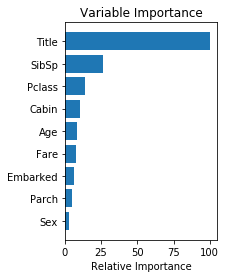

Accuracy on Training set: 0.897
Accuracy on Test set: 0.836


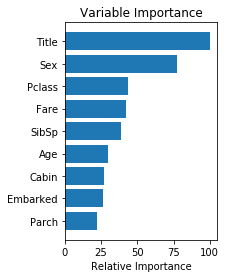

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_f = RandomForestClassifier(n_estimators=200,random_state=0)
model_f.fit(X_train_scaled, y_train)
# print("Accuracy on Training set: {:.3f}".format(model_f.score(X_train_scaled, y_train)))
# print("Accuracy on Test set: {:.3f}".format(model_f.score(X_test_scaled, y_test)))

mostvalue(model_GBC)
mostvalue(model_f)

### ROC curve 시각화

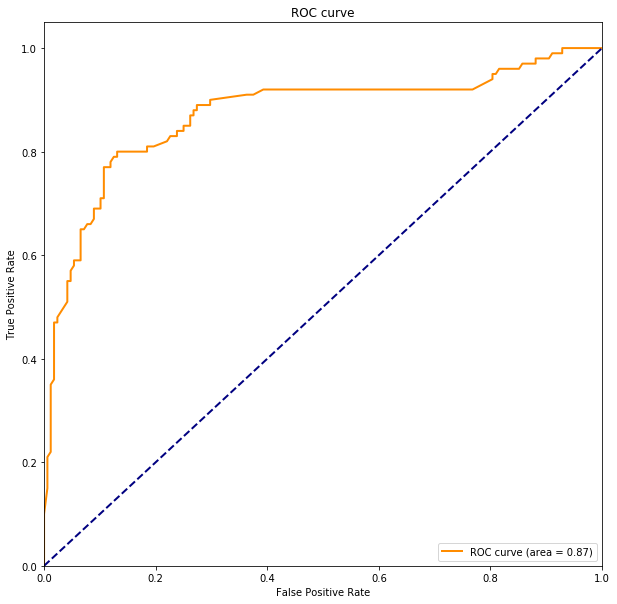

In [21]:
# ROC (RandomForest)
pred_test = model_f.predict_proba(X_test_scaled) # Predict 'probability'
pred_test[:,1]
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

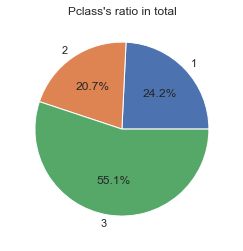

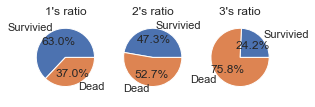

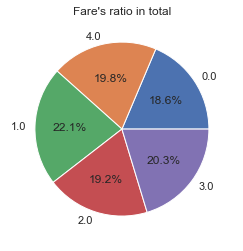

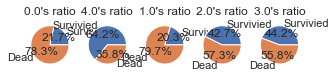

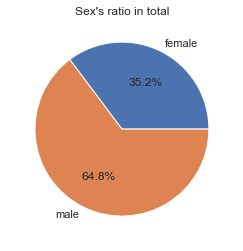

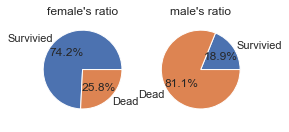

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

df_vi = pd.read_csv('titanic.csv')
df_vi['Fare'] = x_data['Fare']

def pie_chart(feature):
    feature_ratio = df_vi[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = df_vi[df_vi['Survived'] == 1][feature].value_counts()
    dead = df_vi[df_vi['Survived'] == 0][feature].value_counts()
    

    plt.plot(aspect='')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='auto')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()
pie_chart('Pclass')
pie_chart('Fare')
pie_chart('Sex')

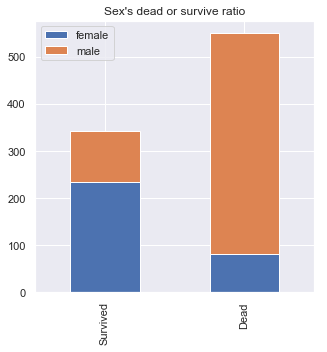

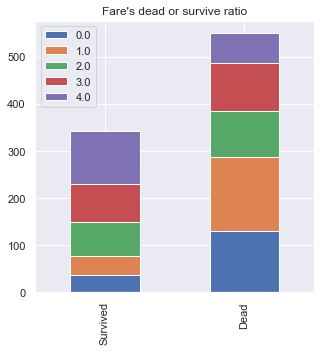

In [23]:
def bar_chart(feature):
    survived = df_vi[df_vi['Survived']==1][feature].value_counts()
    dead = df_vi[df_vi['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(5,5))
    plt.title(feature + '\'s dead or survive ratio')

bar_chart("Sex")
bar_chart("Fare")

In [24]:
data_df2 = pd.read_csv('titanic.csv')
y_data2 = data_df2[['Survived']]
del data_df2['Survived']
x_data2 = data_df2.copy()
x_data2.head(3)
# 불필요한 열 삭제
del x_data2['Name']
del x_data2['Ticket']
del x_data2['Cabin']
del x_data2['Embarked']
del x_data2['Fare']
del x_data2['PassengerId']

# 기본적인 결측치 채우는 방법
mean = x_data2['Age'].median(skipna=True)
x_data2['Age'] = x_data2['Age'].fillna(mean) # or .fillna(int/float/str 값)
# male / female => 1 / 2
x_data2['Sex'] = x_data2['Sex'].apply(lambda x : 1 if x == 'male' else 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x_data2, y_data2, random_state=0)

print(x_data2.head())
# 데이터 정형화
sc = StandardScaler()
sc.fit(x_train2)
x_train_scale2 = sc.transform(x_train2)
x_test_scale2 = sc.transform(x_test2)

# df = pd.DataFrame(x_train_scale2)
# print(df.head())
print('')
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.005}
model_GBC2 = ensemble.GradientBoostingClassifier(**params)
model_GBC2.fit(x_train_scale2, y_train2)
print("GradientBoostingClassifier")
print("Accuracy on Training set: {:.3f}".format(model_GBC2.score(x_train_scale2, y_train2)))
print("Accuracy on Test set: {:.3f}".format(model_GBC2.score(x_test_scale2, y_test2)))

model_f2 = RandomForestClassifier(n_estimators=200)
model_f2.fit(x_train_scale2, y_train2)
print("RandomForest")
print("Accuracy on Training set: {:.3f}".format(model_f2.score(x_train_scale2, y_train2)))
print("Accuracy on Test set: {:.3f}".format(model_f2.score(x_test_scale2, y_test2)))

   Pclass  Sex   Age  SibSp  Parch
0       3    1  22.0      1      0
1       1    2  38.0      1      0
2       3    2  26.0      0      0
3       1    2  35.0      1      0
4       3    1  35.0      0      0



C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier
Accuracy on Training set: 0.874
Accuracy on Test set: 0.825
RandomForest
Accuracy on Training set: 0.924
Accuracy on Test set: 0.803


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


### 과연 레오나르도 디카프리오는 살 수 있을까?

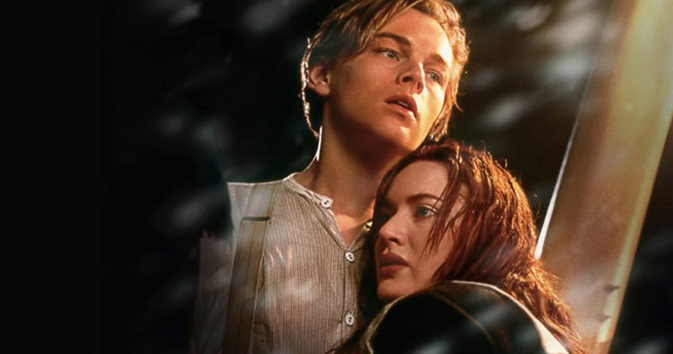

In [25]:
# pclass=3, 성별 남자, 나이 19세, 형제,부모 동승자 없음,Cabin(0),Embarked(0),Title(mr)
dicaprio = np.array( [3, 0, 1.0, 0, 0, 0.0, 0, 0, 0]).reshape(1,9)
x_data.head()
dica_list =model_f.predict_proba(dicaprio)
dica_live = round(float(dica_list[0][0] * 100),2)
dica_dead = round(float(dica_list[0][1] * 100),2)
print(f'디카프리오 죽을확률 : {dica_live}%')
print(f'디카프리오 살확률 : {dica_dead}%')

# pclass=1, 성별 여자, 나이 16세, 형제,부모 동승자 있음(엄마,아빠), Cabin(1),Embarked(1),Title(ms)
winslet = np.array([1, 1, 0.0, 1, 2, 100, 1, 1, 1]).reshape(1,9)
win_list = model_f.predict_proba(winslet)
win_live = round(float(win_list[0][0] * 100),2)
win_dead = round(float(win_list[0][1] * 100),2)
print('')
print(f'윈슬렛 죽을확률 : {win_live}%')
print(f'윈슬렛 살확률 : {win_dead}%')

디카프리오 죽을확률 : 82.42%
디카프리오 살확률 : 17.58%

윈슬렛 죽을확률 : 33.96%
윈슬렛 살확률 : 66.04%


### 딥러닝 사용 모델

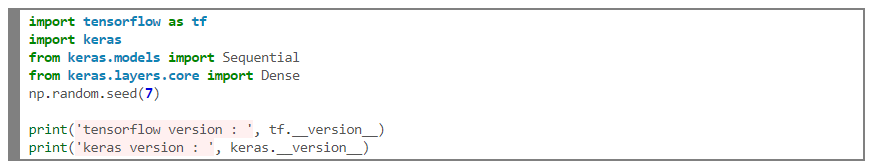

### 모델 예측 결과

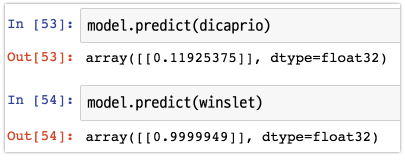